In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
detim=pd.read_csv("delivery_time.csv")
detim
detim.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


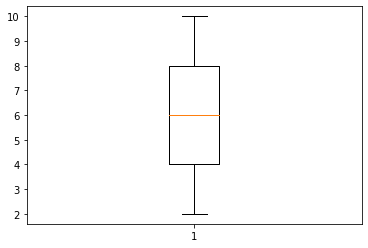

In [10]:
plt.boxplot(detim.SortingTime)
detim.describe()

In [11]:
detim

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x23dee7231c0>,
 'caps': [<matplotlib.lines.Line2D at 0x23dee723880>,
 'boxes': [<matplotlib.lines.Line2D at 0x23dee684e20>],
 'medians': [<matplotlib.lines.Line2D at 0x23dee723f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x23dee7382e0>],
 'means': []}

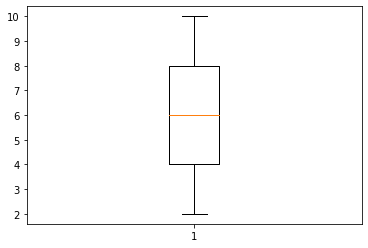

In [14]:
plt.boxplot(detim.SortingTime)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

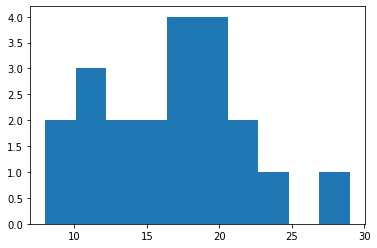

In [13]:
plt.hist(detim.DeliveryTime)

Text(0, 0.5, 'SortingTime')

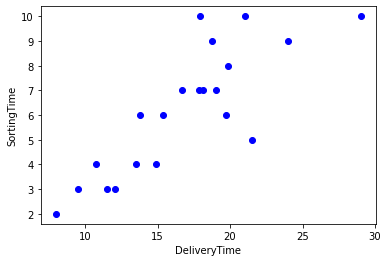

In [15]:
plt.plot(detim.DeliveryTime,detim.SortingTime,"bo")
plt.xlabel("DeliveryTime")
plt.ylabel("SortingTime")

In [16]:
detim.SortingTime.corr(detim.DeliveryTime)

0.8259972607955325

In [17]:
import statsmodels.formula.api as smf
model=smf.ols("SortingTime~DeliveryTime",data=detim).fit()
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [18]:
model.summary()
model.resid 
model.resid_pearson 

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [19]:
#print(model.conf_int(0.05))

Text(0.5, 0, 'DeliveryTime')

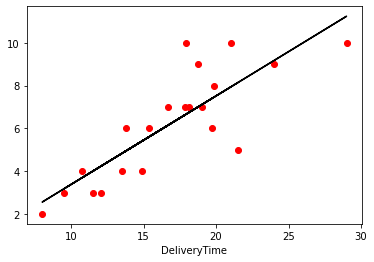

In [21]:
import matplotlib.pylab as plt
plt.scatter(x=detim['DeliveryTime'],y=detim['SortingTime'],color='red')
plt.plot(detim['DeliveryTime'],pred,color='black')
plt.xlabel('DeliveryTime')

In [31]:
pred = model.predict(detim.iloc[:,0])
pred
pd.set_option("display.max_rows", 109) 
pred
rmse_lin = np.sqrt(np.mean((np.array(detim['SortingTime'])-np.array(pred))**2))
rmse_lin 

1.3337477286899515

In [27]:
model2 = smf.ols('SortingTime~np.log(DeliveryTime)',data=detim).fit()
model2.params
model2.resid 
model2.resid_pearson 

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.59e-06
Time:                        07:40:45   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#prediction model for Salary_hike

In [35]:
saldat=pd.read_csv("Salary_Data.csv")
saldat
saldat.columns

Index(['YearsExperience', 'Salary'], dtype='object')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


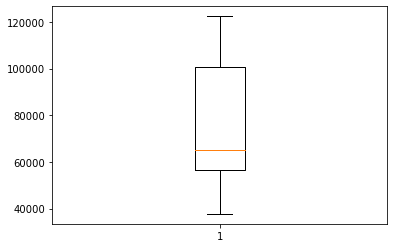

In [38]:
plt.boxplot(saldat.Salary)
saldat.describe()

In [39]:
saldat

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23df230fc10>,
 'caps': [<matplotlib.lines.Line2D at 0x23df2316e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x23df230fe20>],
 'medians': [<matplotlib.lines.Line2D at 0x23df23168b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23df2335940>],
 'means': []}

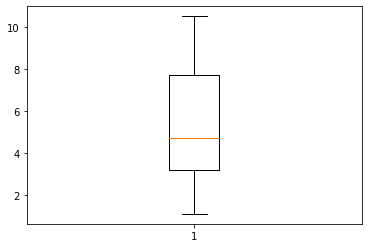

In [41]:
plt.boxplot(saldat.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x23df25b2a30>,
 'caps': [<matplotlib.lines.Line2D at 0x23df25d2130>,
 'boxes': [<matplotlib.lines.Line2D at 0x23df25b2790>],
 'medians': [<matplotlib.lines.Line2D at 0x23df25d27f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23df25d2b50>],
 'means': []}

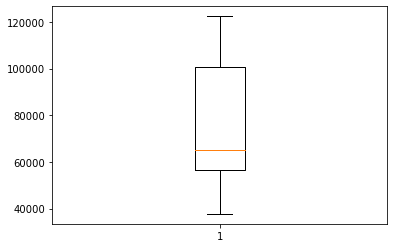

In [42]:
plt.boxplot(saldat.Salary)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

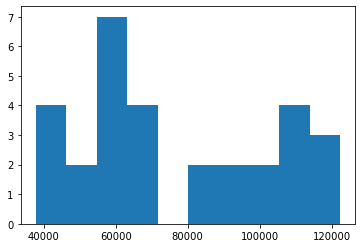

In [43]:
plt.hist(saldat.Salary)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

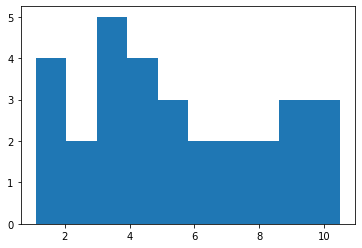

In [44]:
plt.hist(saldat.YearsExperience)

Text(0, 0.5, 'YearsExperience')

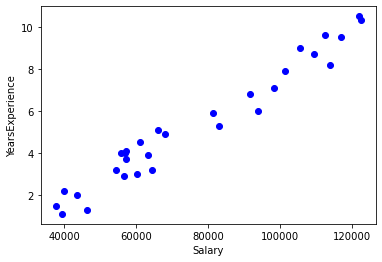

In [45]:
plt.plot(saldat.Salary,saldat.YearsExperience,"bo")
plt.xlabel("Salary")
plt.ylabel("YearsExperience")

In [46]:
saldat.Salary.corr(saldat.YearsExperience)

0.9782416184887598

In [47]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=saldat).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [48]:
model.summary()
model.resid 
model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [57]:
#print(model.conf_int(0.05))

ValueError: x and y must have same first dimension, but have shapes (30,) and (21,)

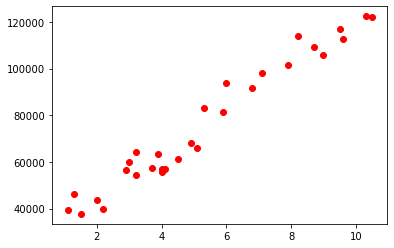

In [61]:
import matplotlib.pylab as plt
plt.scatter(x=saldat['YearsExperience'],y=saldat['Salary'],color='red')
plt.plot(saldat['Salary'],pred,color='black')
plt.xlabel('YearsExperience')

In [62]:
pred = model.predict(detim.iloc[:,0])
pred
pd.set_option("display.max_rows", 109) 
pred
rmse_lin = np.sqrt(np.mean((np.array(saldat['Salary'])-np.array(pred))**2))
rmse_lin 

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'YearsExperience' is not defined
    Salary~YearsExperience
           ^^^^^^^^^^^^^^^

In [63]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=saldat).fit()
model2.params
model2.resid 
model2.resid_pearson 

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [64]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.25e-13
Time:                        08:02:34   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""